* [Бутстреп и А/Б тестирование](https://habr.com/ru/companies/X5Tech/articles/679842/)
* [Как определить размер выборки для бутстрэпа старым дедовским способом](https://habr.com/ru/amp/publications/707816/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [9]:
def get_bootstrap(data_one, data_two, boot_it=1000, statistic=np.mean, conf_level=0.95):
    '''Функция для проверки гипотез с помощью бутстрапа
    
    :param data_one: числовые значения первой выборки
    :param data_two: числовые значения второй выборки
    :param boot_it : количество бутстрэп-подвыборок
    :param statistic : интересующая нас статистика
    :param conf_level : уровень значимости   
    :return p_value: p-value                        
    '''
    
    
    boot_len = max(len(data_one), len(data_two))    
    boot_data = []
    for _ in range(boot_it):
        sample_data_one = np.random.choice(a=data_one, size=boot_len, replace=True)
        sample_data_two = np.random.choice(a=data_two, size=boot_len, replace=True)
        boot_data.append(statistic(sample_data_one) - statistic(sample_data_two))

    left_quant = (1 - conf_level) / 2
    right_quant = 1 - (1 - conf_level) / 2
    ci = np.quantile(boot_data, [left_quant, right_quant]) 
    p_1 = norm.cdf(x=0, loc=np.mean(boot_data), scale=np.std(boot_data))
    p_2 = norm.cdf(x=0, loc=-np.mean(boot_data), scale=np.std(boot_data))
    p_value = min(p_1, p_2) * 2 

    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=boot_data, color='r')
    plt.vlines(ci, ymin=0, ymax=100, linestyle='--', color='b')
    plt.xlabel('Разница статистик в группах')
    plt.ylabel('Частота')
    plt.title("")
    plt.show()
    
    return p_value

In [10]:
a = np.random.normal(loc=10, scale=2, size = 1000)
b = np.random.normal(loc=10.5, scale=2, size = 1000)

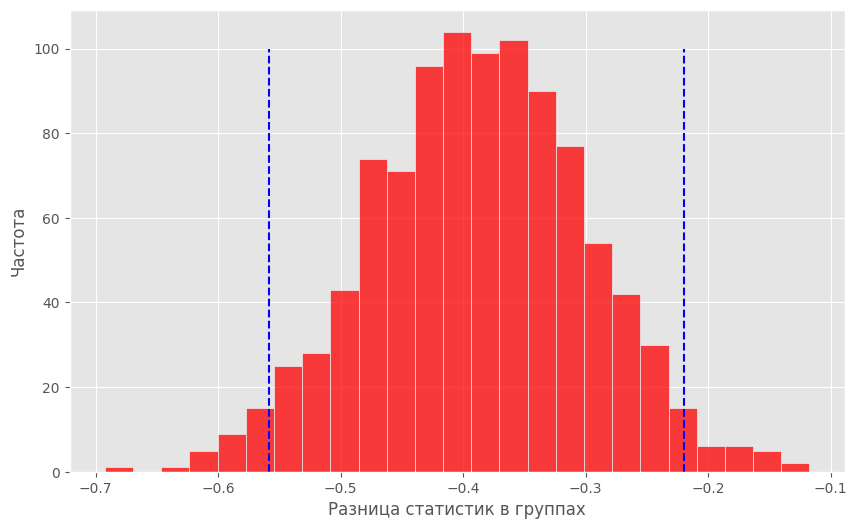

1.014408157996567e-05

In [12]:
get_bootstrap(a, b)

## Функция генерации подвыборок

In [13]:
def generate_bootstrap_metrics(data_one, data_two, bootstrap_iter, bootstrap_agg_func, q = 0.95):
    """Генерирует значения метрики, полученные с помощью бутстрепа.

    :param data_one, data_two (np.array): значения метрик в группах.
    :param bootstrap_iter (int): количество итераций бутстрепа.
    :param bootstrap_agg_func (str): метрика эксперимента.
        Возможные значения ['mean', 'quantile'].
    :param q (float) квантиль
    :return bootstrap_metrics, pe_metric:
        bootstrap_metrics (np.array) - множество значений статистики теста,
            посчитанные на бутстрепных выборках.
        pe_metric (float) - значение статистики теста посчитанное по исходным данным.
    """
    bootstrap_data_one = np.random.choice(data_one, (len(data_one), bootstrap_iter))
    bootstrap_data_two = np.random.choice(data_two, (len(data_two), bootstrap_iter))
    if bootstrap_agg_func == 'mean':
        bootstrap_metrics = bootstrap_data_two.mean(axis=0) - bootstrap_data_one.mean(axis=0)
        pe_metric = data_two.mean() - data_one.mean()
        return bootstrap_metrics, pe_metric
    elif bootstrap_agg_func == 'quantile':
        bootstrap_metrics = np.quantile(bootstrap_data_two, q, axis=0) - np.quantile(bootstrap_data_one, q, axis=0)
        pe_metric = np.quantile(data_two, q) - np.quantile(data_one, q)
        return bootstrap_metrics, pe_metric
    else:
        raise ValueError('Неверное значение bootstrap_agg_func')